# Mini Project - Regression

<b>Problem Statement </b> The company now wants to predict the cost they should set for a new variant of these kinds of bags based on the below attributes.
<ul>
    <li>Height – The height of the bag</li>
    <li>Width – The width of the bag</li>
    <li>Length – The length of the bag</li>
    <li>Weight – The weight the bag can carry</li>
    <li>Weight1 – Weight the bag can carry after expansion</li>
</ul>
As a result, they want you to build a prediction model which can correctly set the cost of the bag provided the attributes are given.

# Analyse the dataset and do EDA(Exploratory Data Analysis) 

Exploratory Data Analysis (EDA) in Python is the first step in data analysis process.In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.
<ul>
        <li>Description of data</li>
        <li>Handling missing data</li>
        <li>Handling outliers</li>
    </ul>    
EDA refers to exploring the dataset from various facets such as outliers, correlations, wrong data types, Null values etc.

In [1]:
#import the relevent libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Import the datasets

In [2]:
#read the csv file and display the top 5
data = pd.read_csv('Data_miniproject.csv')


### The structure of the data

In [3]:
#print dataset shape
print(data.shape)

(159, 6)


In [4]:
#print dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
Cost       159 non-null float64
Weight     159 non-null float64
Weight1    159 non-null float64
Length     159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6)
memory usage: 7.5 KB


In [5]:
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Cost,Weight,Weight1,Length,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
90%,930.000000,38.200000,41.200000,45.340000,15.190400,6.742100
95%,1000.000000,41.190000,44.100000,46.740000,16.377320,7.284620
99%,1571.000000,56.000000,60.000000,64.000000,18.685296,7.679758


### Get First (and Last) rows

In [6]:
print("First 5 rows")
print(data.head())
print("Last 5 rows")
print(data.tail())

First 5 rows
    Cost  Weight  Weight1  Length   Height   Width
0  242.0    23.2     25.4    30.0  11.5200  4.0200
1  290.0    24.0     26.3    31.2  12.4800  4.3056
2  340.0    23.9     26.5    31.1  12.3778  4.6961
3  363.0    26.3     29.0    33.5  12.7300  4.4555
4  430.0    26.5     29.0    34.0  12.4440  5.1340
Last 5 rows
     Cost  Weight  Weight1  Length  Height   Width
154  12.2    11.5     12.2    13.4  2.0904  1.3936
155  13.4    11.7     12.4    13.5  2.4300  1.2690
156  12.2    12.1     13.0    13.8  2.2770  1.2558
157  19.7    13.2     14.3    15.2  2.8728  2.0672
158  19.9    13.8     15.0    16.2  2.9322  1.8792


### Validating Null

In [7]:
#Validating Null
data.isnull().sum()

Cost       0
Weight     0
Weight1    0
Length     0
Height     0
Width      0
dtype: int64

There is no null values in the given data set so no need for dropping the rows or columns or assgining the mean  values

### Validating Zero

Validating the Zero using the plot you can see the zero values

In [8]:
print("Printing the Zero Values")
print(data[data["Cost"]==0])
print(data[data["Weight"]==0])
print(data[data["Weight1"]==0])
print(data[data["Height"]==0])
print(data[data["Width"]==0])

Printing the Zero Values
    Cost  Weight  Weight1  Length  Height   Width
40   0.0    19.0     20.5    22.8  6.4752  3.3516
Empty DataFrame
Columns: [Cost, Weight, Weight1, Length, Height, Width]
Index: []
Empty DataFrame
Columns: [Cost, Weight, Weight1, Length, Height, Width]
Index: []
Empty DataFrame
Columns: [Cost, Weight, Weight1, Length, Height, Width]
Index: []
Empty DataFrame
Columns: [Cost, Weight, Weight1, Length, Height, Width]
Index: []


<b> From the above we can see one cost value is zero we have to replace this with mean</b>

<Figure size 432x288 with 0 Axes>

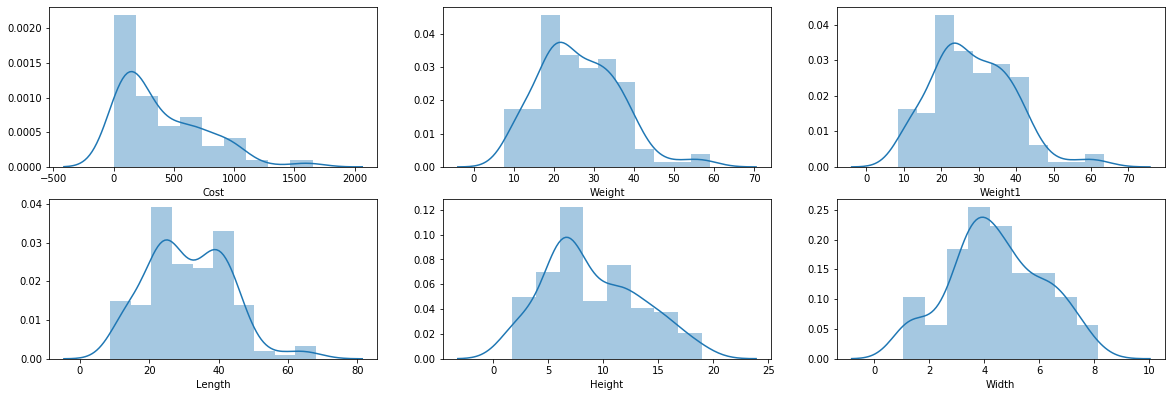

In [9]:
plt.figure(1) 
plt.figure(figsize=(20,10))
plt.subplot(331)
sns.distplot(data['Cost'])
plt.subplot(332)
sns.distplot(data['Weight'])
plt.subplot(333)
sns.distplot(data['Weight1'])
plt.subplot(334)
sns.distplot(data['Length'])
plt.subplot(335)
sns.distplot(data['Height'])
plt.subplot(336)
sns.distplot(data['Width'])

<b>Replacing Zero values to the Mean values </b>

In [10]:
### 1.3 Validating Zero and assgining to Mean
data[data["Cost"]==0]=data["Cost"].mean()
data[data["Weight"]==0]=data["Weight"].mean()
data[data["Weight1"]==0]=data["Weight1"].mean()
data[data["Length"]==0]=data["Length"].mean()
data[data["Height"]==0]=data["Height"].mean()
data[data["Width"]==0]=data["Width"].mean()

###  Handling Outliers

<b>BoxPlot:</b>
A box plot is a method for graphically depicting groups of numerical data through their quartiles.

### Univariate method
One of the simplest methods for detecting outliers is the use of box plots. A box plot is a graphical display for describing the distributions of the data. Box plots use the median and the lower and upper quartiles.

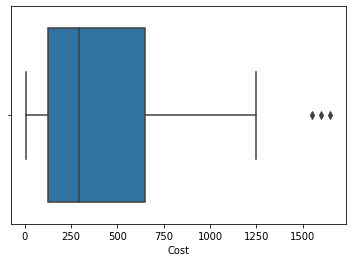

In [11]:
sns.boxplot(data['Cost'])

Heighter Values
       Cost  Weight  Weight1  Length  Height  Width
142  1600.0    56.0     60.0    64.0   9.600  6.144
143  1550.0    56.0     60.0    64.0   9.600  6.144
144  1650.0    59.0     63.4    68.0  10.812  7.480
Empty DataFrame
Columns: [Cost, Weight, Weight1, Length, Height, Width]
Index: []


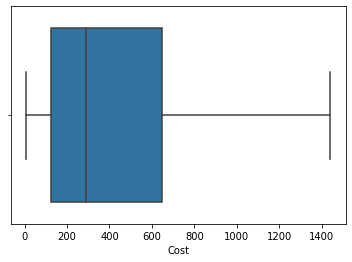

In [12]:
# Total 3 values are in the outlayores of the cost we have to replace with the maximum value.
Q1 = data["Cost"].quantile(0.25)
Q3 = data["Cost"].quantile(0.75)
IQR = Q3 - Q1
print("Heighter Values")
print(data[data["Cost"] > (Q3 + 1.5 * IQR)])
data["Cost"][data["Cost"] > (Q3 + 1.5 * IQR)] = (Q3+1.5*IQR)
print(data[data["Cost"] > (Q3 + 1.5 * IQR)])
sns.boxplot(data['Cost'])


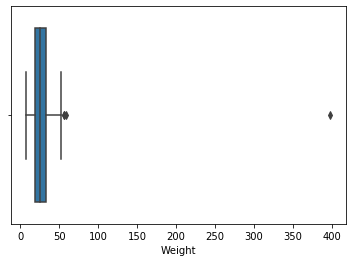

In [13]:
sns.boxplot(data['Weight'])

Heighter Values
            Cost      Weight     Weight1      Length      Height       Width
40    398.326415  398.326415  398.326415  398.326415  398.326415  398.326415
142  1441.250000   56.000000   60.000000   64.000000    9.600000    6.144000
143  1441.250000   56.000000   60.000000   64.000000    9.600000    6.144000
144  1441.250000   59.000000   63.400000   68.000000   10.812000    7.480000
Empty DataFrame
Columns: [Cost, Weight, Weight1, Length, Height, Width]
Index: []


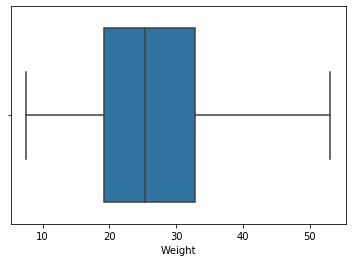

In [14]:
# Total 4 values are in the outlayores we have to replace with the maximum value.
Q1 = data["Weight"].quantile(0.25)
Q3 = data["Weight"].quantile(0.75)
IQR = Q3 - Q1
print("Heighter Values")
print(data[data["Weight"] > (Q3 + 1.5 * IQR)])
data["Weight"][data["Weight"] > (Q3 + 1.5 * IQR)] = (Q3+1.5*IQR)
print(data[data["Weight"] > (Q3 + 1.5 * IQR)])
sns.boxplot(data['Weight'])

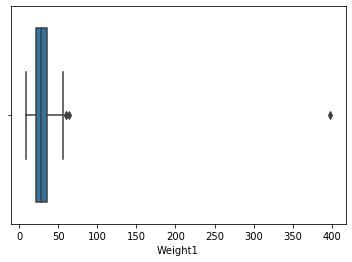

In [15]:
sns.boxplot(data['Weight1'])

Heighter Values
            Cost  Weight     Weight1      Length      Height       Width
40    398.326415  53.075  398.326415  398.326415  398.326415  398.326415
142  1441.250000  53.075   60.000000   64.000000    9.600000    6.144000
143  1441.250000  53.075   60.000000   64.000000    9.600000    6.144000
144  1441.250000  53.075   63.400000   68.000000   10.812000    7.480000
Empty DataFrame
Columns: [Cost, Weight, Weight1, Length, Height, Width]
Index: []


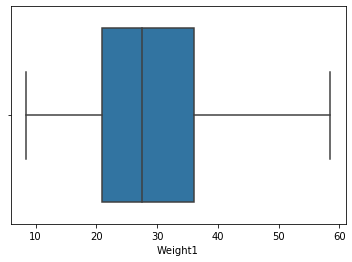

In [16]:
# Total 4 values are in the outlayores we have to replace with the maximum value.
Q1 = data["Weight1"].quantile(0.25)
Q3 = data["Weight1"].quantile(0.75)
IQR = Q3 - Q1
print("Heighter Values")
print(data[data["Weight1"] > (Q3 + 1.5 * IQR)])
data["Weight1"][data["Weight1"] > (Q3 + 1.5 * IQR)] = (Q3+1.5*IQR)
print(data[data["Weight1"] > (Q3 + 1.5 * IQR)])
sns.boxplot(data['Weight1'])

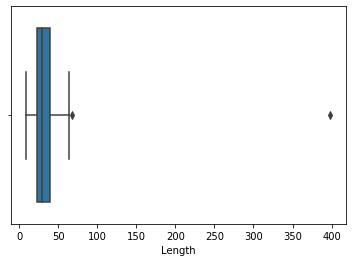

In [17]:
sns.boxplot(data['Length'])

Heighter Values
            Cost  Weight  Weight1      Length      Height       Width
40    398.326415  53.075     58.5  398.326415  398.326415  398.326415
144  1441.250000  53.075     58.5   68.000000   10.812000    7.480000
Empty DataFrame
Columns: [Cost, Weight, Weight1, Length, Height, Width]
Index: []


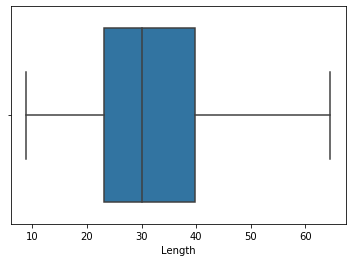

In [18]:
# Total 2 values are in the outlayores we have to replace with the maximum value.
Q1 = data["Length"].quantile(0.25)
Q3 = data["Length"].quantile(0.75)
IQR = Q3 - Q1
print("Heighter Values")
print(data[data["Length"] > (Q3 + 1.5 * IQR)])
data["Length"][data["Length"] > (Q3 + 1.5 * IQR)] = (Q3+1.5*IQR)
print(data[data["Length"] > (Q3 + 1.5 * IQR)])
sns.boxplot(data['Length'])

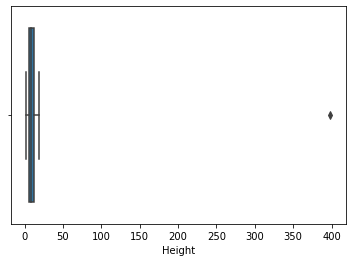

In [19]:
sns.boxplot(data['Height'])

Heighter Values
          Cost  Weight  Weight1  Length      Height       Width
40  398.326415  53.075     58.5  64.575  398.326415  398.326415
Empty DataFrame
Columns: [Cost, Weight, Weight1, Length, Height, Width]
Index: []


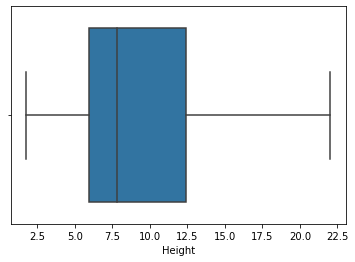

In [20]:
# Total 1 value are in the outlayores we have to replace with the maximum value.
Q1 = data["Height"].quantile(0.25)
Q3 = data["Height"].quantile(0.75)
IQR = Q3 - Q1
print("Heighter Values")
print(data[data["Height"] > (Q3 + 1.5 * IQR)])
data["Height"][data["Height"] > (Q3 + 1.5 * IQR)] = (Q3+1.5*IQR)
print(data[data["Height"] > (Q3 + 1.5 * IQR)])
sns.boxplot(data['Height'])

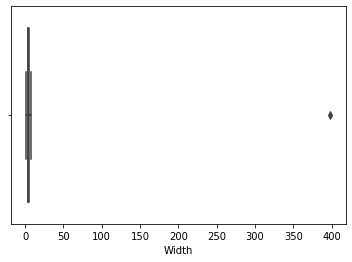

In [21]:
sns.boxplot(data['Width'])

Heighter Values
          Cost  Weight  Weight1  Length    Height       Width
40  398.326415  53.075     58.5  64.575  22.03105  398.326415
Empty DataFrame
Columns: [Cost, Weight, Weight1, Length, Height, Width]
Index: []


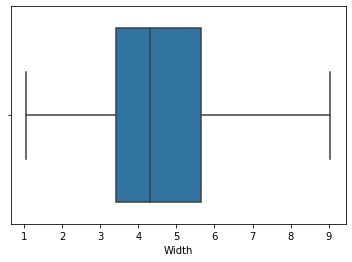

In [22]:
# Total 1 value are in the outlayores we have to replace with the maximum value.
Q1 = data["Width"].quantile(0.25)
Q3 = data["Width"].quantile(0.75)
IQR = Q3 - Q1
print("Heighter Values")
print(data[data["Width"] > (Q3 + 1.5 * IQR)])
data["Width"][data["Width"] > (Q3 + 1.5 * IQR)] = (Q3+1.5*IQR)
print(data[data["Width"] > (Q3 + 1.5 * IQR)])
sns.boxplot(data['Width'])

<Figure size 432x288 with 0 Axes>

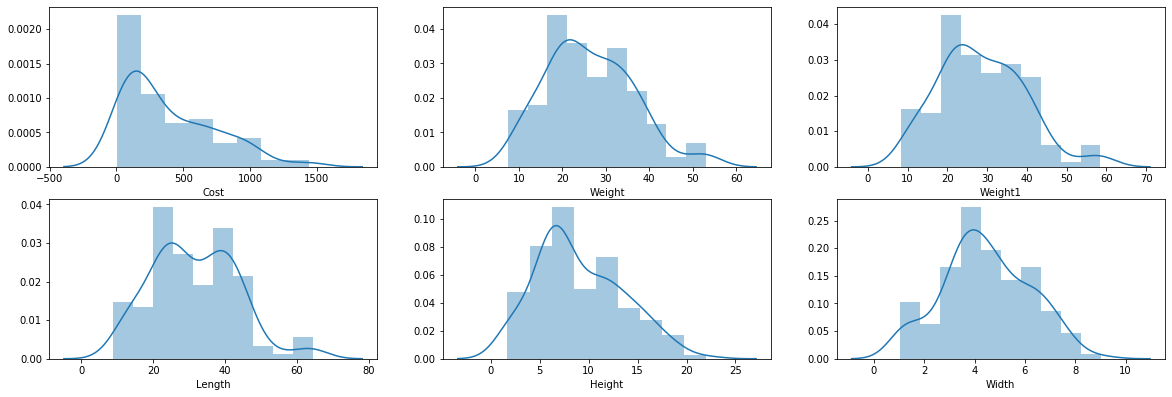

In [23]:
plt.figure(1) 
plt.figure(figsize=(20,10))
plt.subplot(331)
sns.distplot(data['Cost'])
plt.subplot(332)
sns.distplot(data['Weight'])
plt.subplot(333)
sns.distplot(data['Weight1'])
plt.subplot(334)
sns.distplot(data['Length'])
plt.subplot(335)
sns.distplot(data['Height'])
plt.subplot(336)
sns.distplot(data['Width'])

In [24]:
#data.hist(figsize=(16,20), bins=50, xlabelsize=8,ylabelsize=8)
#This need to dicuss with Shankar.

### Bivariate Analysis
The idea to analyze two variables at the same and find any relation between them.
Scatter plot shows the relationship between two variable but does not indicates the strength of relationship amongst them. To find the strength of the relationship, we use Correlation. 

<Figure size 432x288 with 0 Axes>

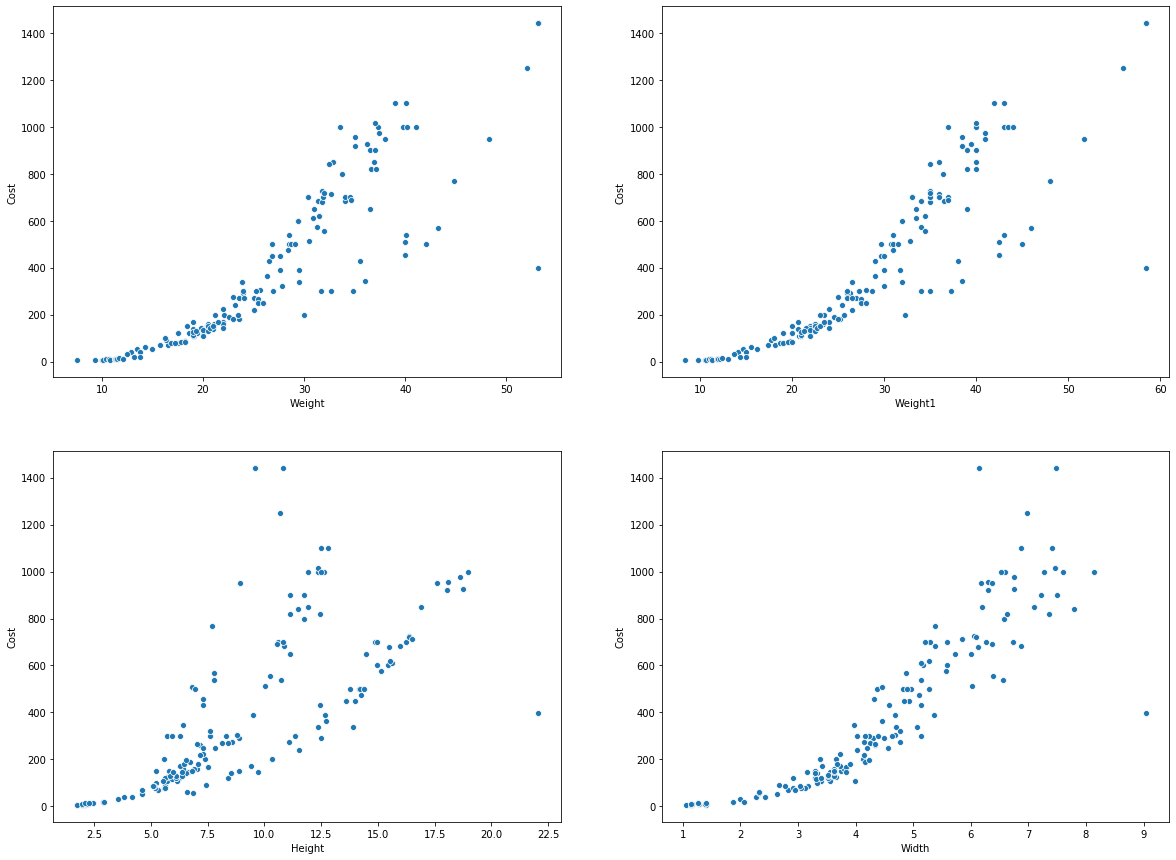

In [25]:
plt.figure(1) 
plt.figure(figsize=(20,15))
plt.subplot(221)
sns.scatterplot(data['Weight'],data['Cost'])
plt.subplot(222)
sns.scatterplot(data['Weight1'],data['Cost'])
plt.subplot(223)
sns.scatterplot(data['Height'],data['Cost'])
plt.subplot(224)
sns.scatterplot(data['Width'],data['Cost'])


<b>The given Cost and other files the bi variant analysis gives that data have
Strong Postive Corrlation or
Moderate Postive Corrlation</b>


### Corrlation Coeffiecient
A correlation matrix is a table showing the value of the correlation coefficient (Correlation coefficients are used in statistics to measure how strong a relationship is between two variables. ) between sets of variables. Each attribute of the dataset is compared with the other attributes to find out the correlation coefficient. This analysis allows you to see which pairs have the highest correlation, the pairs which are highly correlated represent the same variance of the dataset thus we can further analyze them to understand which attribute among the pairs are most significant for building the model

In [26]:
data.corr()

,Cost,Weight,Weight1,Length,Height,Width
Cost,1.000000,0.890825,0.893581,0.899237,0.720961,0.878893
Weight,0.890825,1.000000,0.999390,0.992213,0.654309,0.880956
Weight1,0.893581,0.999390,1.000000,0.994406,0.665302,0.884114
Length,0.899237,0.992213,0.994406,1.000000,0.721245,0.885436
Height,0.720961,0.654309,0.665302,0.721245,1.000000,0.802559
Width,0.878893,0.880956,0.884114,0.885436,0.802559,1.000000


### Heat Map

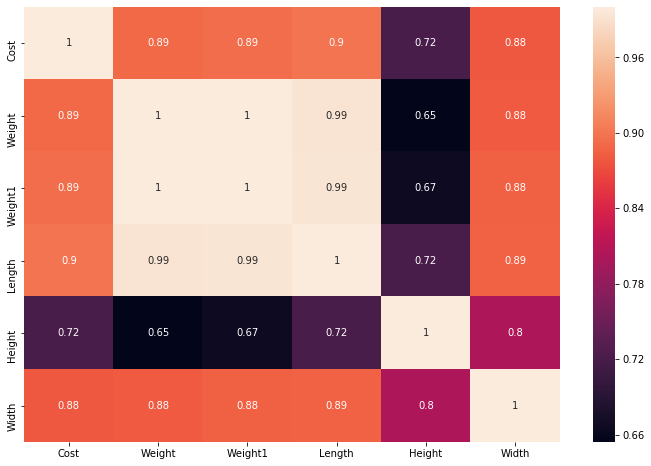

In [27]:
plt.figure(figsize=(12, 8))

vg_corr = data.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

Above you can see the correlation network of all the variables selected, correlation value lies between -1 to +1. Highly correlated variables will have correlation value close to +1 and less correlated variables will have correlation value close to -1

All the values are related to cost is close to 1 except height. so we can consider all the values for the predication

# Build the Models using 
1. Linear Regression using Gradient Descent
2. Linear Regression using Stochastic Gradient Descent
3. Linear Regression using Mini-batch Gradient Descent
4. Linear Regression using sklearn 

In [28]:
# Define the features and output variable
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [29]:
#Feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [30]:
# Divide the data train and test numpy arrays with 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]  # Additional column for bias parameter  
y_train = y_train.reset_index(drop=True)
                        
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test] # Additional column for bias parameter
y_test = y_test.reset_index(drop=True) 
 


### Generic functions for all Gradient Descent algorithms

In [31]:
# Generic cost function for calculating the Average Sum of Squared Error
def cost_function(X, Y, Weights):
    m = len(X)
    cost = np.sum((X.dot(Weights) - Y) ** 2)/(2 * m)
    return cost

# Function to calculate the performance measures for a model based on actual and predcited values
def model_measures(X,Y,y_pred):
    num_data = X.shape[0]
    mse = mean_squared_error(Y,y_pred)
    rmse = math.sqrt(mse)
    rse = mse * num_data
    r2 = r2_score(Y,y_pred)
    return mse, rmse, r2

# Function to Predict output variable using optimized model parameters
def model_prediction(X,weights):
    y_pred = weights[0] + np.dot(X[:,1],weights[1]) + np.dot(X[:,2],weights[2]) + np.dot(X[:,3],weights[3]) + np.dot(X[:,4],weights[4]) + np.dot(X[:,5],weights[5])
    return y_pred

# Multiple Linear Regression model using Gradient Descent

In [32]:
# Function to calculate the Gradient Descent
def gradient_descent(X, Y, Weights, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
 
    for iteration in range(iterations):
        hypothesis = X.dot(Weights)
        loss = hypothesis - Y
        gradient = X.T.dot(loss)/m
        Weights = Weights - alpha * gradient
        cost = cost_function(X, Y, Weights)
        cost_history[iteration] = cost
    return Weights, cost_history

In [33]:
# Gradient Descent for the Train data
Weights_GD = np.zeros(X_train.shape[1])
alpha_GD = 0.01
iter_GD = 300
new_Weights_GD, cost_history_GD = gradient_descent(X_train, y_train, Weights_GD, alpha_GD, iter_GD)
new_Weights_GD

array([370.57233399,  74.12121059,  75.13939055,  72.05771615,
        22.33902378,  84.10564988])

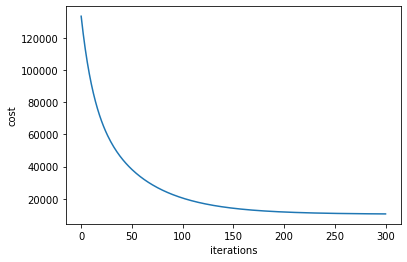

In [34]:
# Plot the Cost change for different iterations
x_axis = np.linspace(0, iter_GD, len(cost_history_GD), endpoint=True)
plt.plot(x_axis, cost_history_GD)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

Looking at this graph it is apparent that the cost after around 200 iterations does not reduce which means we can use only 200 to 300 range for iterations. Also we can notice that cost reduces faster initially and then slows down.

###### Gradient Descent - MSE, RMSE, R2 Score

In [35]:
# Find MSE, RMSE, R^2 Score for the Gradient Descent Model
y_pred_test_GD = model_prediction(X_test,new_Weights_GD)
mse_GD, rmse_GD, r2_GD = model_measures(X_test,y_test,y_pred_test_GD)

print('Theta 0 =%.3f' %y_pred_test_GD[0])
print('Theta 1 =%.3f' %y_pred_test_GD[1])
print('Theta 2 =%.3f' %y_pred_test_GD[2])
print('Theta 3 =%.3f' %y_pred_test_GD[3])
print('Theta 4 =%.3f' %y_pred_test_GD[4])
print('Theta 5 =%.3f' %y_pred_test_GD[5])

print('Mean Square Error =%.3f' %mse_GD)
print('Root Mean Square Error =%.3f' %rmse_GD)
print('r Square =%.3f' %r2_GD)

Theta 0 =71.590
Theta 1 =-151.242
Theta 2 =373.002
Theta 3 =301.171
Theta 4 =188.709
Theta 5 =705.649
Mean Square Error =17621.824
Root Mean Square Error =132.747
r Square =0.856


# Multiple Linear Regression model using Stochastic Gradient Descent

In [36]:
# Function to calculate Stochastic Gradient Descent
def stochastic_gradient_descent(X, Y, Weights, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    gradient = 0
    for iteration in range(iterations):
        for i in range(m):
            hypothesis = X[i].dot(Weights)
            loss = hypothesis - Y[i]
            gradient = X[i].T.dot(loss) / m
            Weights = Weights - alpha * gradient
            cost = cost_function(X[i], Y[i], Weights)
        cost_history[iteration] = cost
    return Weights, cost_history

In [37]:
# Stochastics Gradient Descent for the data
Weights_SGD = np.zeros(X_train.shape[1])
alpha_SGD = 0.01
iter_SGD = 300
new_Weights_SGD, cost_history_SGD = stochastic_gradient_descent(X_train, y_train, Weights_SGD, alpha_SGD, iter_SGD)
new_Weights_SGD

array([370.29747548,  74.13909419,  75.16160555,  72.06815897,
        22.39785153,  84.12126968])

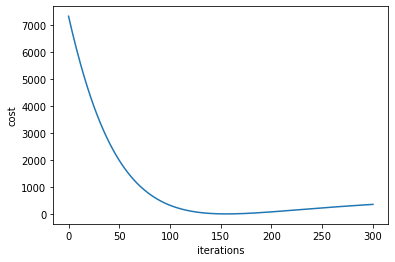

In [38]:
# Plot the Cost change for different iterations
x_axis = np.linspace(0, iter_SGD, len(cost_history_SGD), endpoint=True)
plt.plot(x_axis, cost_history_SGD)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

###### Stochastic Gradient Descent - MSE, RMSE, R2 Score

In [39]:
# Find MSE, RMSE, R^2 Score for the Stochastic Gradient Descent Model
y_pred_SGD = model_prediction(X_test,new_Weights_SGD)
mse_SGD, rmse_SGD, r2_SGD = model_measures(X_test,y_test,y_pred_SGD)
print(mse_SGD, rmse_SGD, r2_SGD)

print('Theta 0 =%.3f' %y_pred_SGD[0])
print('Theta 1 =%.3f' %y_pred_SGD[1])
print('Theta 2 =%.3f' %y_pred_SGD[2])
print('Theta 3 =%.3f' %y_pred_SGD[3])
print('Theta 4 =%.3f' %y_pred_SGD[4])
print('Theta 5 =%.3f' %y_pred_SGD[5])

print('Mean Square Error =%.3f' %mse_SGD)
print('Root Mean Square Error =%.3f' %rmse_SGD)
print('r Square =%.3f' %r2_SGD)

17642.876636575707 132.82649071843954 0.8559692774836724
Theta 0 =71.202
Theta 1 =-151.711
Theta 2 =372.688
Theta 3 =300.872
Theta 4 =188.347
Theta 5 =705.566
Mean Square Error =17642.877
Root Mean Square Error =132.826
r Square =0.856


# Multiple Linear Regression model using Minibatch Gradient Descent

In [40]:
# Function to Divide the data into mini batches as per batch Size
def create_mini_batches(X, Y, batch_size): 
    mini_batches = []
    Y_n = np.array(Y, dtype = X.dtype)
    data = np.hstack((X, Y_n[:,None])) 
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
        
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini))
        
    return mini_batches

In [41]:
# Function for Mini Batch Gradient Descent
def minibatch_gradient_descent(X, Y, Weights, alpha, iterations, batch_size):
    cost_history = [0] * iterations
    m = batch_size

    for iteration in range(iterations):
        mini_batches = create_mini_batches(X, Y, batch_size)
        cost = 0.0
        for batch in mini_batches:
            X_m,Y_m = batch
            Y_m = pd.Series(map(lambda x: x[0], Y_m))
            hypothesis = X_m.dot(Weights)
            loss = hypothesis - Y_m
            gradient = X_m.T.dot(loss) 
            Weights = Weights - alpha * gradient
            cost += cost_function(X_m, Y_m, Weights)
        cost_history[iteration] = cost
    return Weights, cost_history



In [42]:
# Mini Batch Gradient Descent
Weights_MBGD = np.zeros(X_train.shape[1])
alpha_MBGD = 0.01
iter_MBGD = 10
batch_size = 10
new_Weights_MBGD, cost_history_MBGD = minibatch_gradient_descent(X_train, y_train, Weights_MBGD, alpha_MBGD, iter_MBGD, batch_size)
new_Weights_MBGD

array([389.58647723,  74.76148461,  81.14140895,  85.19814371,
         9.55248049, 105.47119863])

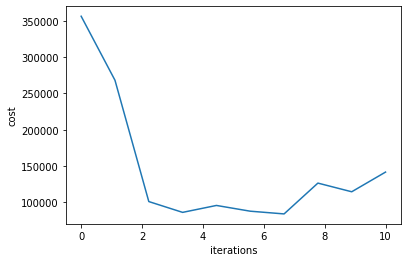

In [43]:
x_axis = np.linspace(0, iter_MBGD, len(cost_history_MBGD), endpoint=True)
plt.plot(x_axis, cost_history_MBGD)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

###### Minibatch Gradient Descent - MSE, RMSE, R2 Score

In [44]:
# Find MSE, RMSE, R^2 Score for the Mini Batch Gradient Descent Model
y_pred_MBGD = model_prediction(X_test,new_Weights_MBGD)
mse_MBGD, rmse_MBGD, r2_MBGD = model_measures(X_test,y_test,y_pred_MBGD)
print(mse_MBGD, rmse_MBGD, r2_MBGD)
print('Theta 0 =%.3f' %y_pred_MBGD[0])
print('Theta 1 =%.3f' %y_pred_MBGD[1])
print('Theta 2 =%.3f' %y_pred_MBGD[2])
print('Theta 3 =%.3f' %y_pred_MBGD[3])
print('Theta 4 =%.3f' %y_pred_MBGD[4])
print('Theta 5 =%.3f' %y_pred_MBGD[5])

print('Mean Square Error =%.3f' %mse_MBGD)
print('Root Mean Square Error =%.3f' %rmse_MBGD)
print('r Square =%.3f' %r2_MBGD)

17420.26305377597 131.98584414161985 0.8577866225704778
Theta 0 =65.744
Theta 1 =-182.503
Theta 2 =394.810
Theta 3 =314.916
Theta 4 =197.409
Theta 5 =740.150
Mean Square Error =17420.263
Root Mean Square Error =131.986
r Square =0.858


# Multiple Linear Regression model using LinearRegression Method from sklearn.linear_model

In [45]:
#sklearn Linear Regression
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train,y_train)
print(l_reg.intercept_)
print(l_reg.coef_)

387.1915856172578
[   0.         -310.68569134  202.87501705  310.7390491   -42.02291645
  151.65296264]


###### sklearn.linear_model.LinearRegression - MSE, RMSE, R2 Score

In [46]:
# Find MSE, RMSE and R^2 score for the sklearn Linear Regression Model
y_pred_skl = l_reg.predict(X_test)
mse_skl, rmse_skl, r2_skl = model_measures(X_test, y_test, y_pred_skl)
print(mse_skl, rmse_skl, r2_skl)

print('Mean Square Error =%.3f' %mse_skl)
print('Root Mean Square Error =%.3f' %rmse_skl)
print('r Square =%.3f' %r2_skl)

17687.718482950342 132.99518217946974 0.8556032031940117
Mean Square Error =17687.718
Root Mean Square Error =132.995
r Square =0.856


In [47]:
print ("Gadient Descent Model Output ")
print('Mean Square Error =%.3f' %mse_GD)
print('Root Mean Square Error =%.3f' %rmse_GD)
print('r Square =%.3f' %r2_GD)

print("Stochastic Gradient Descent Model Output")
print('Mean Square Error =%.3f' %mse_SGD)
print('Root Mean Square Error =%.3f' %rmse_SGD)
print('r Square =%.3f' %r2_SGD)


print("Mini Batch Gadient Descent Model Output  ")
print('Mean Square Error =%.3f' %mse_MBGD)
print('Root Mean Square Error =%.3f' %rmse_MBGD)
print('r Square =%.3f' %r2_MBGD)

print("Using sklearn.linear_model Output ")
print('Mean Square Error =%.3f' %mse_skl)
print('Root Mean Square Error =%.3f' %rmse_skl)
print('r Square =%.3f' %r2_skl)

Gadient Descent Model Output 
Mean Square Error =17621.824
Root Mean Square Error =132.747
r Square =0.856
Stochastic Gradient Descent Model Output
Mean Square Error =17642.877
Root Mean Square Error =132.826
r Square =0.856
Mini Batch Gadient Descent Model Output  
Mean Square Error =17420.263
Root Mean Square Error =131.986
r Square =0.858
Using sklearn.linear_model Output 
Mean Square Error =17687.718
Root Mean Square Error =132.995
r Square =0.856


<b>We have did the split of 70:30 for training and testing<b/>
    <br>
<b>The output of the values of cost of the bag and validated with 30% testing data of the cost and drived MSE and RMSE and rSquare are more are less equal for <ul>
    <li>Gadient Descent</li>
    <li>Stochastic Gradient Descent</li>
    <li>Mini Batch Gadient Descent</li>
    <li>Sklearn.linear_mode</li>
    
</ul>
  <b/>
    <b>Mini Batch Gradient Descent reaches the optimum values Theta with minimal iteration with in 10 iteration and 10 batch size 
</b>